# Do contact calculations as easily as on contact.engineering in your jupyter notebook

For more details on the simulations and more detailed use of the ContactMechanics Library, see notebooks
- [Hardwall_simulation.ipynb](Hardwall_simulation.ipynb)
- [plastic_simulation_cone.ipynb](plastic_simulation_cone.ipynb)
- [constrained_conjugate_gradients.ipynb](constrained_conjugate_gradients.ipynb)

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from SurfaceTopography import read_published_container

## Read a published topography (Contact Mechanics challenge)

In [60]:
c, = read_published_container('https://contact.engineering/go/867nv')

In [61]:
[t.info["name"] for t in c ]

['50000x50000_random.txt', '5000x5000_random.txt', '500x500_random.txt']

In [62]:
t = c[2]

workaround to access the docstring

In [63]:
from ContactMechanics.PipelineFunction import contact_mechanics
print(contact_mechanics.__doc__)


    Carry out an automated contact mechanics calculations.

    Parameters
    ----------
    self : :obj:`SurfaceTopography.UniformTopographyInterface`
        Topography on which to carry out the contact calculation.
    substrate : str, optional
        Specifies whether substrate should be 'periodic' or 'nonperiodic'. If
        set to None, it will be chosen according to whether the topography is
        periodic or nonperiodic.
        (Default: None)
    nsteps : int, optional
        Number of contact steps. (Default: 10)
    offsets : list of floats, optional
        List with offsets. Can only be set if `nsteps` and `pressures` is
        set to None. (Default: None)
    pressures : list of floats, optional
        List with pressures in units of E*. Can only be set if `nsteps` and
        `offsets` is set to None. (Default: None)
    hardness : float, optional
        Hardness in units of E*. Calculation is fully elastic if set to None.
        (Default: None)
    maxiter :

## Automatic contact calculations like on contact.engineering


In [64]:
mean_pressure, total_contact_area, mean_displacement, mean_gap, converged = t.contact_mechanics(nsteps=10)

Text(0, 0.5, 'relative contact area')

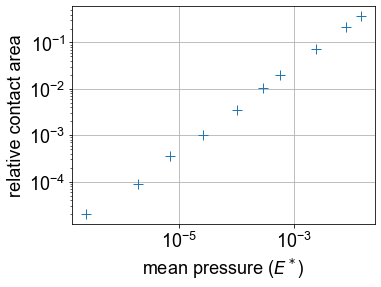

In [65]:
fig, ax = plt.subplots()
ax.loglog(mean_pressure, total_contact_area / np.prod(t.physical_sizes), "+")
ax.set_xlabel("mean pressure ($E^*$)")
ax.set_ylabel("relative contact area")
